In [1]:
# Importem llibreries

import ipywidgets as widgets
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np #importem la llibreria
import random

In [66]:
# Visualitzarem només 3 decimals per mostra en les taules
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
names=["Num",'URL','Category']
def load_dataset(path):
    #dataset = pd.read_csv(path,names = names, delimiter=',')
    dataset=pd.read_csv('URL_Classification.csv',names=names, na_filter=False)
    return dataset

# Carreguem dataset asignat
dataset = load_dataset('URL_Classification.csv')
data = dataset.values
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (1562978, 3)


In [67]:
# dimensio

In [68]:
x = data[:, 1]
y = data[:,2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (1562978, 3)
Dimensionalitat de les entrades X (1562978,)
Dimensionalitat de l'atribut Y (1562978,)


In [69]:
print(dataset.dtypes)

Num          int64
URL         object
Category    object
dtype: object


#### Valors nulls

In [70]:
print(dataset.isnull().sum())

Num         0
URL         3
Category    0
dtype: int64


In [71]:
dataset = dataset.dropna()
print("Dimensionalitat de la BBDD:", dataset.shape)
print(dataset.isnull().sum())

Dimensionalitat de la BBDD: (1562975, 3)
Num         0
URL         0
Category    0
dtype: int64


#### Visualitzem les 5 primeres instàncies:


In [72]:
dataset.head()

,Num,URL,Category
0,1,http://www.liquidgeneration.com/,Adult
1,2,http://www.onlineanime.org/,Adult
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,4,http://www.galeon.com/kmh/,Adult
4,5,http://www.fanworkrecs.com/,Adult


#### Obtenim lista de categories


In [76]:
#dataset[2] = dataset[2].replace({'Adult': 1})
l_categories = []
for c in dataset["Category"]:
    if c not in l_categories:
        l_categories.append(c)
print(l_categories)
#dataset['Sex'] = dataset['Sex'].replace({'I': 2})
#dataset['Sex'] = dataset['Sex'].replace({'F': 3})

['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society', 'Sports']


#### Calculem les estadístiques generals.


In [75]:
dataset.describe()

,Num
count,1562975.000
mean,781489.545
std,451193.113
min,1.000
25%,390745.500
50%,781490.000
75%,1172233.500
max,1562978.000


#### Visualitzem nº elements de totes les categories


<IPython.core.display.Javascript object>


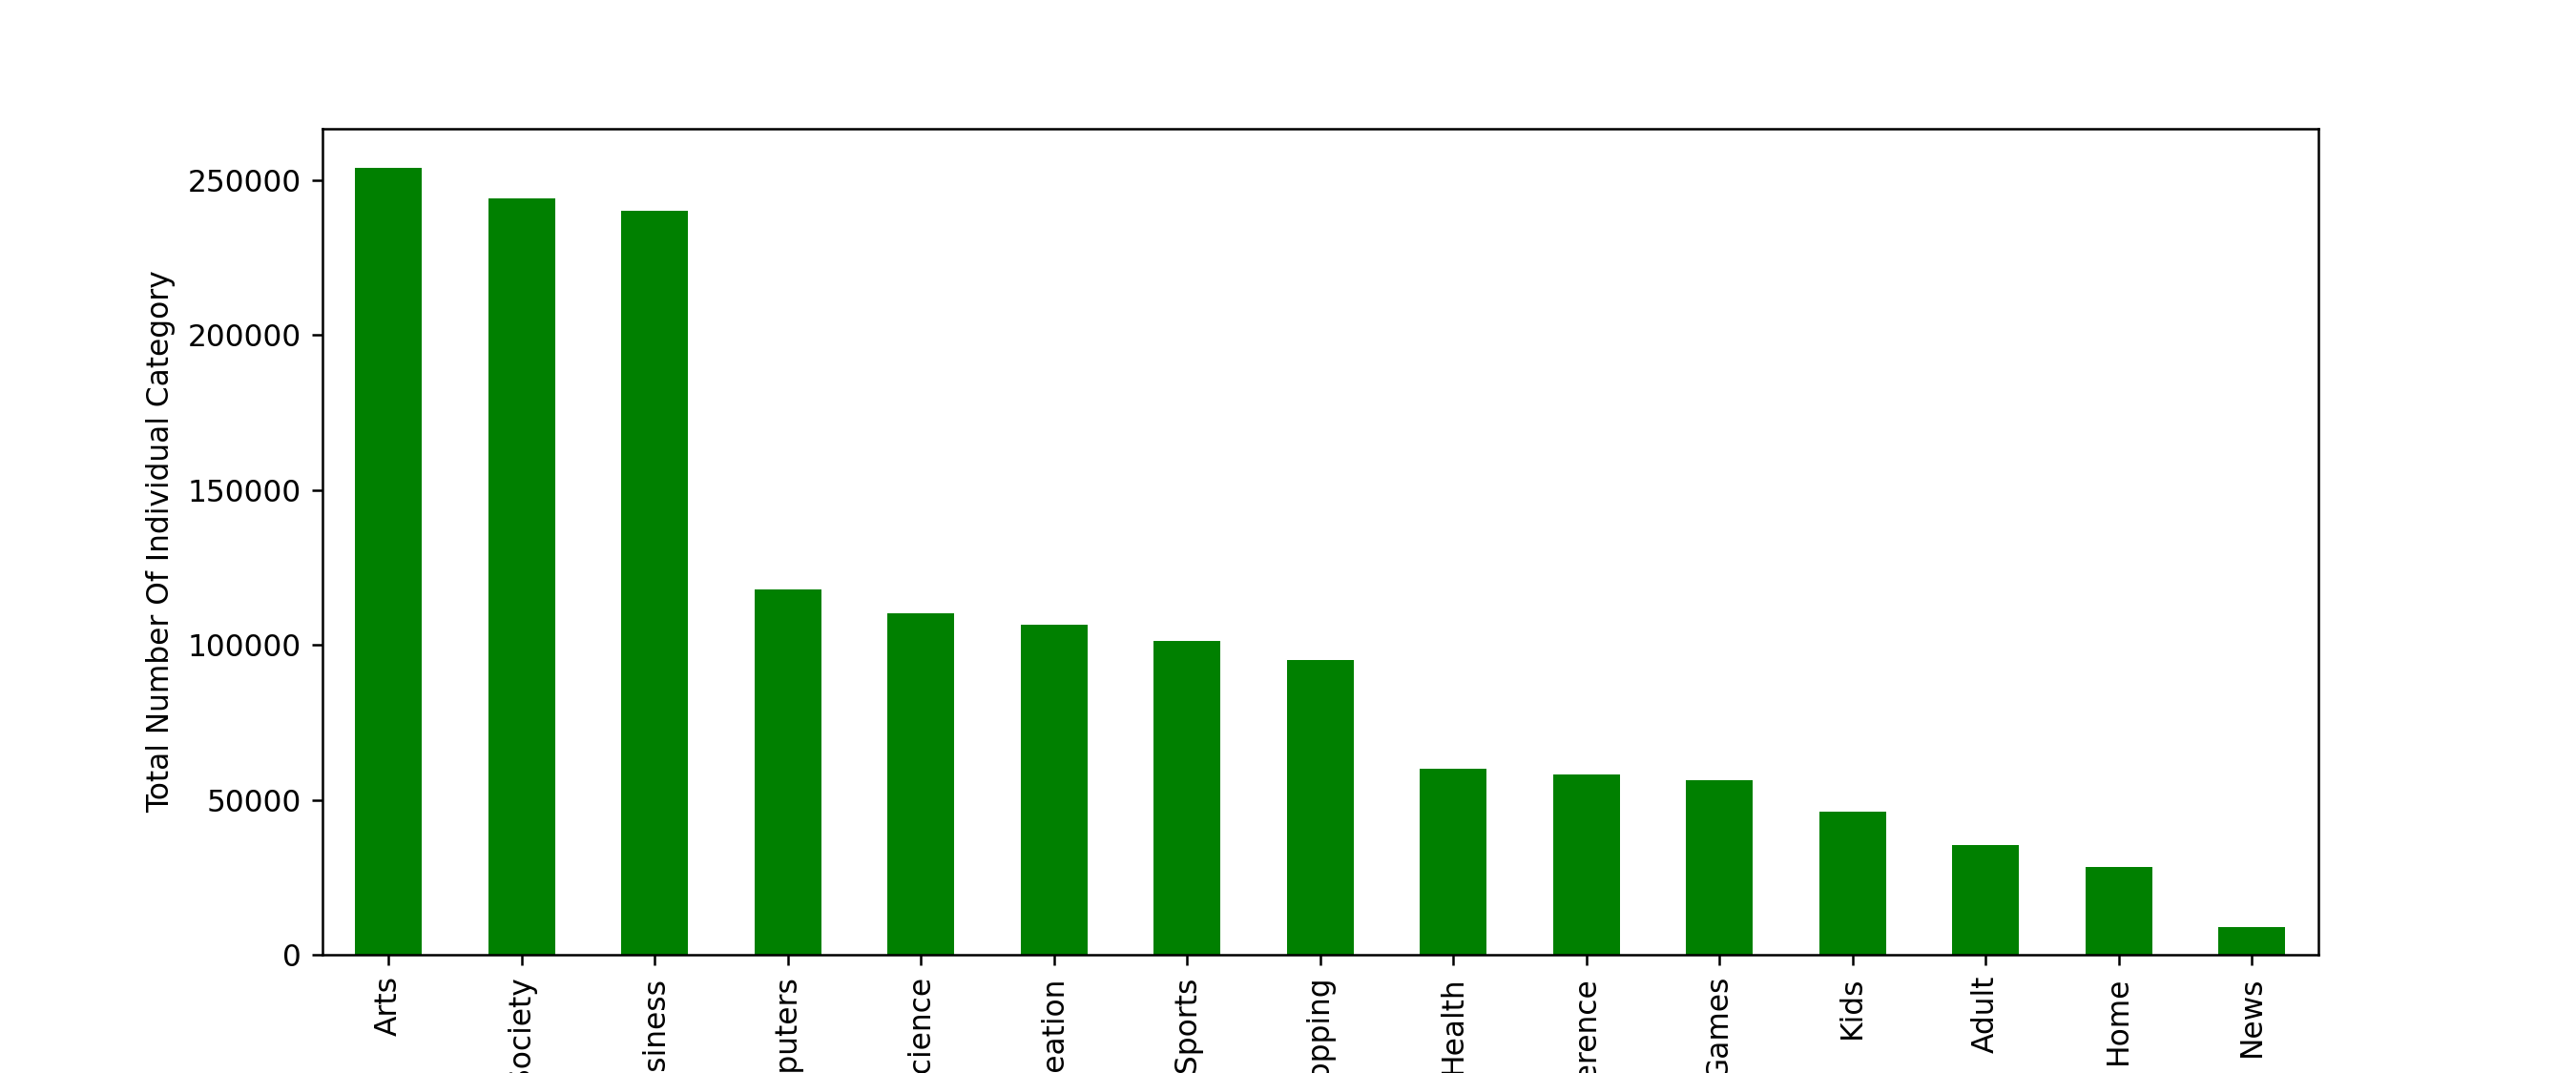

Text(0, 0.5, 'Total Number Of Individual Category')

In [78]:
dataset.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

#### Dividim dataset per categories

In [402]:
d0 = dataset[dataset['Category'].values =='Adult']
d1 = dataset[dataset['Category'].values =='Arts']
d2 = dataset[dataset['Category'].values =='Business']
d3 = dataset[dataset['Category'].values =='Computers']
d4 = dataset[dataset['Category'].values =='Games']
d5 = dataset[dataset['Category'].values =='Health']
d6 = dataset[dataset['Category'].values =='Home']
d7 = dataset[dataset['Category'].values =='Kids']
d8 = dataset[dataset['Category'].values == 'News']
d9 = dataset[dataset['Category'].values =='Recreation']
d10 = dataset[dataset['Category'].values =='Reference']
d11 = dataset[dataset['Category'].values =='Science']
d12 = dataset[dataset['Category'].values =='Shopping']
d13 = dataset[dataset['Category'].values =='Society']
d14 = dataset[dataset['Category'].values =='Sports']

In [ ]:
dataset["Category"] = dataset["Category"].replace({'Adult': 0})
dataset["Category"] = dataset["Category"].replace({'Arts': 1})
dataset["Category"] = dataset["Category"].replace({'Business': 2})
dataset["Category"] = dataset["Category"].replace({'Computers': 3})
dataset["Category"] = dataset["Category"].replace({'Games': 4})
dataset["Category"] = dataset["Category"].replace({'Health': 5})
dataset["Category"] = dataset["Category"].replace({'Home': 6})
dataset["Category"] = dataset["Category"].replace({'Kids': 7})
dataset["Category"] = dataset["Category"].replace({'News': 8})
dataset["Category"] = dataset["Category"].replace({'Recreation': 9})
dataset["Category"] = dataset["Category"].replace({'Reference': 10})
dataset["Category"] = dataset["Category"].replace({'Science': 11})
dataset["Category"] = dataset["Category"].replace({'Shopping': 12})
dataset["Category"] = dataset["Category"].replace({'Society': 13})
dataset["Category"] = dataset["Category"].replace({'Sports': 14})

In [299]:
d0

,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult
...,...,...
35321,http://www.kostnica.civ.pl/,Adult
35322,http://smok13.w.interia.pl/,Adult
35323,http://www.republika.pl/dark_side_of_thy_soul/,Adult
35324,http://radoslaw.ligas.webpark.pl,Adult


In [398]:
from sklearn.model_selection import train_test_split

#forma 1
def train_test_from_data1(tz,d_list,n_instancias):
    data_train = 0
    data_test = 0
    c = 0
    for data in d_list:
        long = int(len(data)*n_instancias)
        print("long:" ,long)
        #print("len dx: ",data)
        data = data[:long]
        if c == 0:
            tra, tes = train_test_split(data, test_size=tz) #train, test
            data_train = tra
            data_test = tes
        else:
            tra, tes = train_test_split(data, test_size=tz) #train, test
            data_train=pd.concat([data_train, tra],axis=0)
            data_test=pd.concat([data_test, tes],axis=0)
        c=1
    print("lenedd dx: ",data_train.shape)
            
    return data_train, data_test
 

In [393]:
int(len(d0)*)

27325

In [395]:

from sklearn.model_selection import train_test_split
#forma 22222222222222


tz = 0.02  #20% test
n_instancias = 1   #10 % data del total
d_list = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14]

data_train = 0
data_test = 0
c = 0
for data in d_list:
    print("len dx: ",data)
    if c == 0:
        data_test = data[:2000]
        data.drop(data.index[:2000],inplace= True)
        data_train = data#[:n_instancias]
    else:
        tes = data[:2000]
        data.drop(data.index[:2000],inplace= True)
        tra = data#[:n_instancias]
        
        data_train=pd.concat([data_train, tra],axis=0)
        data_test=pd.concat([data_test, tes],axis=0)
    c=1

SyntaxError: invalid syntax (Temp/ipykernel_14904/3582042691.py, line 6)

In [418]:
tz = 0.01
n_instancias = 1
d_list = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14]

data_train, data_test =  train_test_from_data1(tz,d_list,n_instancias)

# TRAIN
X_train= data_train['URL']
y_train= data_train['Category']


# TEST
X_test = data_test['URL']
y_test = data_test['Category']

long: 35325
long: 253840
long: 240177
long: 117962
long: 56477
long: 60097
long: 28269
long: 46182
long: 8989
long: 106586
long: 58247
long: 110286
long: 95270
long: 243943
long: 101328
lenedd dx:  (1547343, 2)


In [419]:
print(X_train.shape)
print(X_test.shape)

(1547343,)
(15635,)


In [403]:
len(d8)

8989

In [338]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline


In [420]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [421]:
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [422]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

In [423]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

# (0.393680422038592, 0.32626666666666665, 0.3291209981249738, None) data = 1000 * 15
# (0.4851433470985012, 0.3955620018840558, 0.4057061126946715, None) data = 10000 * 15
# (0.5231119138278745, 0.4788900902745344, 0.4742112006386902, None) data = 100000 * 15


#0.1  (0.5691116689624127, 0.504813689429074, 0.49501915860298157, None)

(0.5569755051273574, 0.5049568276303166, 0.4967003578038389, None)

In [414]:
#y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report

In [415]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Adult     0.9141    0.4965    0.6434       707
        Arts     0.5805    0.5909    0.5857      5077
    Business     0.3360    0.8439    0.4806      4804
   Computers     0.6854    0.3987    0.5042      2360
       Games     0.7550    0.5018    0.6029      1130
      Health     0.7153    0.3261    0.4480      1202
        Home     0.8076    0.4152    0.5484       566
        Kids     0.4555    0.3214    0.3769       924
        News     0.6098    0.1389    0.2262       180
  Recreation     0.4939    0.2467    0.3291      2132
   Reference     0.5318    0.4670    0.4973      1165
     Science     0.6300    0.5403    0.5817      2206
    Shopping     0.3930    0.0588    0.1022      1906
     Society     0.5780    0.5552    0.5664      4879
      Sports     0.8073    0.4134    0.5468      2027

    accuracy                         0.5048     31265
   macro avg     0.6195    0.4210    0.4693     31265
weighted avg     0.5691   

In [424]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Adult     0.8812    0.5028    0.6403       354
        Arts     0.6155    0.5833    0.5990      2539
    Business     0.3402    0.8222    0.4812      2402
   Computers     0.6812    0.3983    0.5027      1180
       Games     0.6968    0.4637    0.5569       565
      Health     0.6884    0.3161    0.4333       601
        Home     0.7094    0.5088    0.5926       283
        Kids     0.4068    0.3355    0.3677       462
        News     0.4839    0.1667    0.2479        90
  Recreation     0.4877    0.2786    0.3546      1066
   Reference     0.5044    0.4957    0.5000       583
     Science     0.6178    0.5231    0.5665      1103
    Shopping     0.3833    0.0724    0.1218       953
     Society     0.5829    0.5549    0.5685      2440
      Sports     0.6806    0.4329    0.5292      1014

    accuracy                         0.5050     15635
   macro avg     0.5840    0.4303    0.4708     15635
weighted avg     0.5570   

In [425]:
from sklearn import metrics
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

#10.000
#Naive Bayes Train Accuracy =  0.9893675564402715
#Naive Bayes Test Accuracy =  0.3955620018840558

#100.000
#Naive Bayes Train Accuracy =  0.9754345797118358
#Naive Bayes Test Accuracy =  0.4788900902745344

# 0.2 Naive Bayes Train Accuracy =  0.9503790853769603
#Naive Bayes Test Accuracy =  0.504813689429074

Naive Bayes Train Accuracy =  0.9661419607675867
Naive Bayes Test Accuracy =  0.5049568276303166


In [417]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/'])) 
print(gs_clf.predict(['http://genetik.fu-berlin.de/instengl/indexengl.html'])) 
print(gs_clf.predict(['http://www.gamefaqs.com/computer/doswin/data/920314.html']))


['Business']
['Games']
['Science']
['Games']


In [427]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/'])) 
print(gs_clf.predict(['http://genetik.fu-berlin.de/instengl/indexengl.html'])) 
print(gs_clf.predict(['http://www.gamefaqs.com/computer/doswin/data/920314.html']))

['Business']
['Games']
['Science']
['Games']


In [133]:
data_test.tail

<bound method NDFrame.tail of              Num                                                URL Category
21697      21698                   http://www.fantasyleather.co.uk/    Adult
1672        1673      http://groups.yahoo.com/group/csi-fic-mature/    Adult
29893      29894                      http://www.sexe-audiotel.com/    Adult
16826      16827  http://www.freepornaction.com/tawny_roberts/in...    Adult
19976      19977                  http://voymaster.adultbouncer.com    Adult
...          ...                                                ...      ...
1493780  1493781  http://www.benedictine.edu/benedictine.aspx?pg...   Sports
1562292  1562293                       http://www.wrestlingblog.com   Sports
1536515  1536516  http://en.wikipedia.org/wiki/armenia_national_...   Sports
1509023  1509024            http://www.sluhockey.com/division1.html   Sports
1462683  1462684               http://www.gcaconf.com/sport/4/6.php   Sports

[312602 rows x 3 columns]>

In [266]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree



In [280]:

names=['URL','Category']
df=pd.read_csv('URL_Classification.csv',names=names, na_filter=False)
df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
#df6 = df[77000:1562978]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


In [281]:

df = df[49000:51000]

X_train=dt['URL']
y_train=dt['Category']
#print(X_train)
X_train.shape

X_test=df['URL']
y_test=df['Category']
#print(X_test)
X_test.shape

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))



C:\Users\jiaye\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Train Accuracy =  0.9968666666666667
Naive Bayes Test Accuracy =  0.5525


In [439]:
url = "http://genetik.fu-berlin.de/instengl/indexengl.html"
domain = url.split('//')[-1].split('/')

In [442]:
dom = [] 
for x in domain:
    if dom == []:
        dom = x.split('.')
    else:
        dom +x.split('.')
    


In [443]:
dom

['genetik', 'fu-berlin', 'de']